# 1. Introduction

This is my first submission to Kggle.
https://www.kaggle.com/c/home-data-for-ml-course#tutorials

## 2. Importing Libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
# import missingno as msno
import warnings
warnings.filterwarnings('ignore')


## 3. Retriving Data

In [2]:
train = '/Users/tejaswinalwad/Machine_Learning/Kaggle_Projects/Housing Prices Competition/train.csv'
train_data = pd.read_csv(train)


# 4. Glimpse of the data 

In [3]:
train_data.head(), train_data.columns


(   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
 1   2          20       RL         80.0     9600   Pave   NaN      Reg   
 2   3          60       RL         68.0    11250   Pave   NaN      IR1   
 3   4          70       RL         60.0     9550   Pave   NaN      IR1   
 4   5          60       RL         84.0    14260   Pave   NaN      IR1   
 
   LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
 0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
 1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
 2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
 3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
 4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
 
   MoSold YrSold  SaleType  SaleCondition  SalePrice  
 0   


# 5.  Check for the NULL columns
No NULL columns found. Since this is learning exercise I am only checking for NULL columns. Don't care for NULL values at the moment.

In [5]:
# Train Data
# msno.bar(train_data)
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
# Test Data
# msno.bar(test_data)
train_data.shape

(1460, 81)

In [7]:
train_data.columns.isnull().any()


False

In [8]:
train_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

# 6. Exploratory Data Exploration

**6.1 Top correalated features**

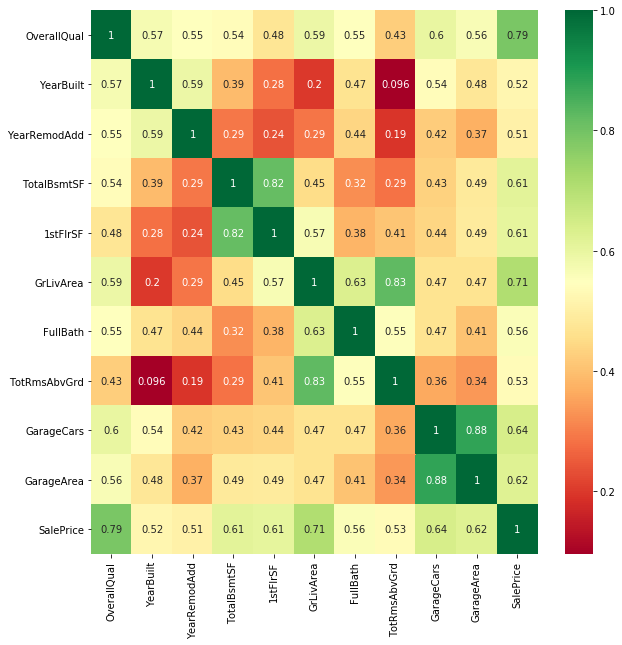

In [9]:
corrmat = train_data.corr()
top_corrmat = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
sns.heatmap(train_data[top_corrmat].corr(),annot=True,cmap="RdYlGn")

***We know there total 6965 NUll values in Train_data dataframe. But lets just concentrate on top correlated feature.
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
Check if there is any null value in above columns.**

In [10]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
for i in cols:
    print("NULL Values in", i, train_data[i].isnull().values.any())

NULL Values in SalePrice False
NULL Values in OverallQual False
NULL Values in GrLivArea False
NULL Values in GarageCars False
NULL Values in TotalBsmtSF False
NULL Values in FullBath False
NULL Values in YearBuilt False


**Looks like we are good for further Exploratory Data Analysis with these top correlated features.**

 **6.2 Distribution of Houseprices**

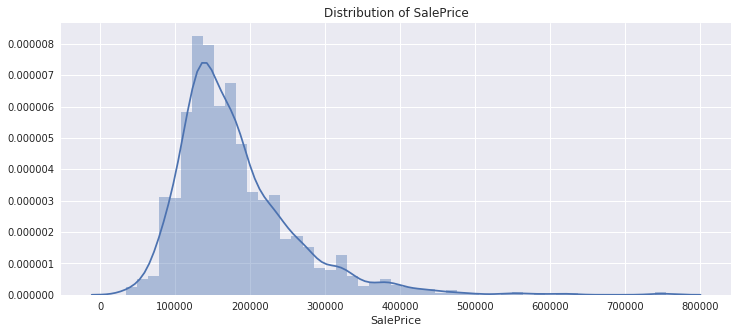

In [127]:
plt.figure(figsize=(12,5))
plt.title("Distribution of SalePrice")
ax = sns.distplot(train_data["SalePrice"])

**6.3 Saleprice Vs Lotsize**

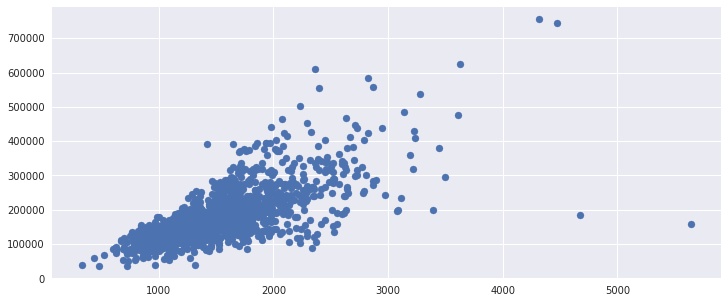

In [128]:
plt.figure(figsize=(12,5))
plt.scatter(x='GrLivArea',y='SalePrice',data=train_data)

**We know outliers can affect the prediction so lets Delete the outliers.** OR Use Robust Regression

In [129]:
#Deleting outliers
# train_data = train_data.drop(train_data[(train_data['GrLivArea']>4000) | (train_data['SalePrice']>700000)].index)

**Lets check out the paiwise relation in our interested features**

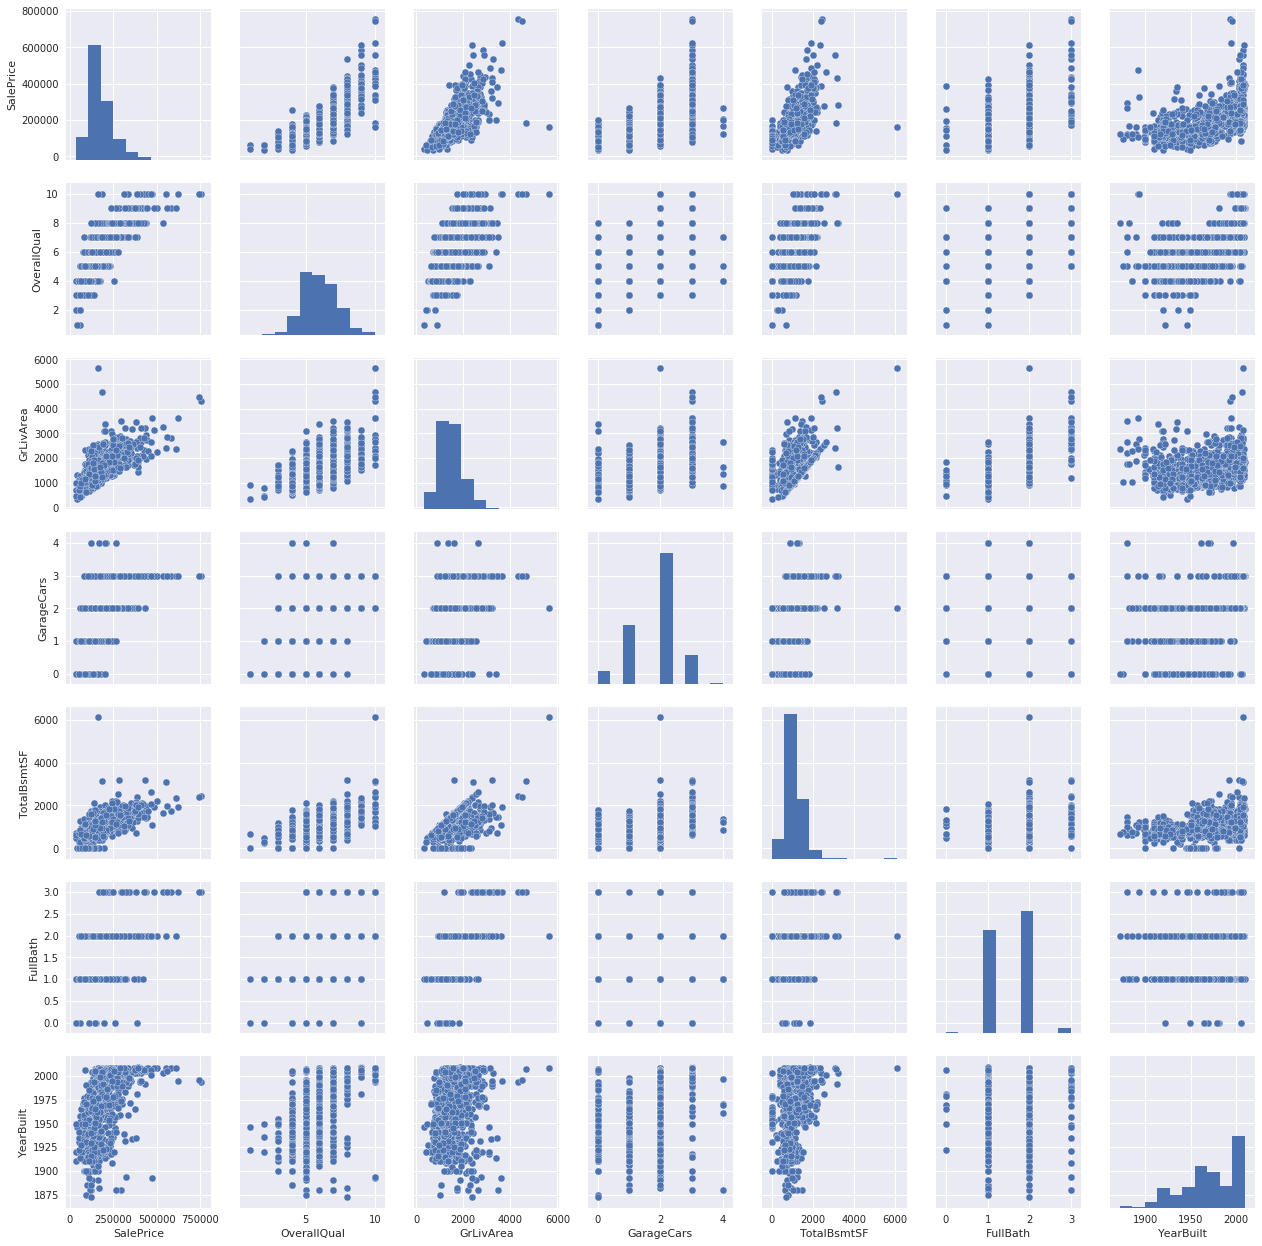

In [130]:

sns.set()
# cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data[cols], size = 2.5)
plt.show();

**6.4 Close look at GrLivArea and SalePrice Linearity after deleting outlier**

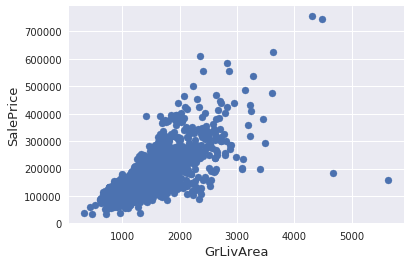

In [131]:
fig, ax = plt.subplots()
ax.scatter(x = train_data['GrLivArea'], y = train_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

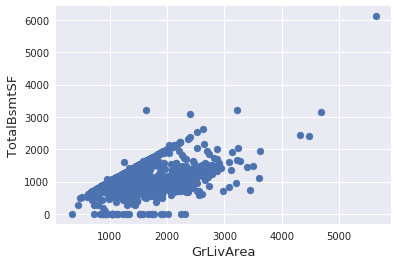

In [132]:
fig, ax = plt.subplots()
ax.scatter(x = train_data['GrLivArea'], y = train_data['TotalBsmtSF'])
plt.ylabel('TotalBsmtSF', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

**6.5 OverallQual and SalePrice**

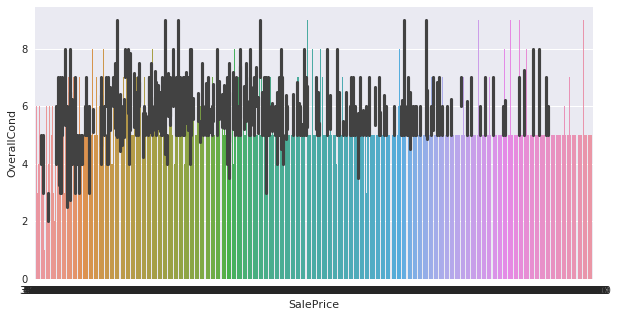

In [133]:
plt.figure(figsize=(10,5))
# plt.tight_layout()
sns.barplot(x='SalePrice',y='OverallCond',data=train_data)

# 7. Creating Models for the Competetion

**Creating differrent Models on Training Data to compaire which performs better**

Split the data and train it on all of **X** and **y**.  

In [11]:
import math
train_data.SalePrice = np.log(train_data.SalePrice)

def rmse(x, y): 
    return math.sqrt(((x-y)**2).mean())

In [12]:
# cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
X = train_data[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]
y = train_data['SalePrice']

X.isnull().any()

OverallQual    False
GrLivArea      False
GarageCars     False
TotalBsmtSF    False
FullBath       False
YearBuilt      False
dtype: bool

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, y_train.shape , X_test.shape

((1095, 6), (1095,), (365, 6))

In [14]:
from sklearn.ensemble import RandomForestRegressor
# from sklearn import metrics
# from sklearn.model_selection import cross_val_score

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


**Print the score using a function**

In [15]:
def print_score(m):
    res  = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_test), y_test),
           m.score(X_train, y_train), m.score(X_test, y_test)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [16]:
rf = RandomForestRegressor(n_estimators=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [17]:
print_score(rf)

[0.14527417499768538, 0.2293846283848151, 0.8648968001625642, 0.6886844936490921]


In [18]:
rf1 = RandomForestRegressor(n_jobs=-1)
rf1.fit(X_train, y_train)
print_score(rf1)

[0.07288189352891114, 0.18793603317149177, 0.9659961497890417, 0.791026006664626]


In [19]:
rf2 = RandomForestRegressor(n_estimators=80, n_jobs=-1, oob_score=True)
rf2.fit(X_train, y_train)
print_score(rf2)

[0.06229889332999304, 0.17944782724366357, 0.9751544014607835, 0.8094765054291411, 0.8222811944245024]


In [50]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold


**Make Predictions**
Read the file of "test" data. And apply your model to make predictions

In [96]:
# Test Data
test = '/Users/tejaswinalwad/Machine_Learning/Kaggle_Projects/Housing Prices Competition/test.csv'
df_test = pd.read_csv(test)

In [97]:
A = df_test[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]

A.isnull().sum()

OverallQual    0
GrLivArea      0
GarageCars     1
TotalBsmtSF    1
FullBath       0
YearBuilt      0
dtype: int64

In [98]:
# new_df_test = proc_df(A, 'SalePrice')
A.GarageCars.fillna(0, inplace=True)        
A.TotalBsmtSF.fillna(0, inplace=True)

A.isnull().any()

OverallQual    False
GrLivArea      False
GarageCars     False
TotalBsmtSF    False
FullBath       False
YearBuilt      False
dtype: bool

In [99]:
prediction = gbc_clf.predict(A)
prediction

array([11.72385893, 11.94205372, 12.00795322, ..., 11.92628622,
       11.72531595, 12.41084243])

In [100]:

output = pd.DataFrame({'Id': df_test.Id,
                       'SalePrice': prediction})
output.to_csv('/Users/tejaswinalwad/Machine_Learning/Kaggle_Projects/Housing Prices Competition/house_submission_gbc.csv', index=False)

## Robust Regression using RANdom SAmple Consensus (RANSAC) Algorithm

In [57]:
from sklearn.linear_model import RANSACRegressor

In [58]:
ransac = RANSACRegressor()

In [59]:
ransac.fit(X_train,y_train)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [60]:
ransac.estimator_.coef_

array([0.06318408, 0.00036477, 0.06428841, 0.00031404, 0.01162206,
       0.00161591])

In [61]:
ransac.estimator_.intercept_

7.481694918106929

In [62]:
print_score(ransac)

[0.17462525011517835, 0.27522830132098886, 0.8047896312231488, 0.5518139759520788]


In [149]:
# print_score(ransac, X_train, y_train, X_test, y_test, train=False)

# AdaBoost / Adaptive Boosting

In [78]:
from sklearn.ensemble import AdaBoostRegressor

In [79]:
ada_clf = AdaBoostRegressor()

In [80]:
ada_clf.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [81]:
print_score(ada_clf)

[0.1742051316264683, 0.1994256712644997, 0.8057277868707762, 0.7646933205427091]


In [83]:
# print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

## AdaBoost with Random Forest

In [82]:
# from sklearn.ensemble import RandomForestClassifier

In [83]:
ada_clf_RF = AdaBoostRegressor(RandomForestRegressor())

In [84]:
ada_clf_RF.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None)

In [85]:
print_score(ada_clf_RF)

[0.04320713681334048, 0.1829351512716997, 0.988049123024116, 0.8019994220678524]


In [88]:
# print_score(ada_clf_RF, X_train, y_train, X_test, y_test, train=False)

# Gradient Boosting / Gradient Boosting Machine (GBM)

In [86]:
from sklearn.ensemble import GradientBoostingRegressor

In [87]:
gbc_clf = GradientBoostingRegressor()
gbc_clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [88]:
print_score(gbc_clf)

[0.12151339157145022, 0.18599616982464975, 0.9054770896808358, 0.7953177736597995]


In [89]:
# print_score(gbc_clf, X_train, y_train, X_test, y_test, train=False) # Test

# Submit Predictions

In [93]:

# The lines below shows you how to save your data in the format needed to score it in the competition
output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': y_test})

output.to_csv('/root/Machine_Learning/ML_Projects/Housing Prices Competition/submission.csv', index=False)